<table align="center" width=100%>
    <tr>
        <td width="50%">
            <img src="1.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Crop Recommendation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="2.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="blue">
                    <b>Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.
                </font>
            </div>
        </td>
    </tr>
</table>

The data used in this project is made by combining various datasets like Indian
weather, soil, Temperature, Humidity and Rainfall, and fertilizers.

Data fields:

N - ratio of Nitrogen content in soil - kg/ha

P - ratio of Phosphorous content in soil - kg/ha

K - ratio of Potassium content in soil - kg/ha

temperature - temperature in degree Celsius

humidity - relative humidity in %

ph - ph value of the soil

rainfall - rainfall in mm

##### Importing required libraries

In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

 
import seaborn as sns
import pydotplus 
from IPython.display import Image  

import random


from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler 

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import tree
import pydotplus
import os

##### Loading dataset

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [3]:
# Size of data
df.shape

(2200, 8)

In [4]:
# Types of crops -Multiclass classification
print('Types of crops:', df['label'].unique())

Types of crops: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


#### Crop prediction dataset consists of 2200 records and data for 22 various vegetable and fruit crops.

### Data Preprocessing 

In [5]:
# Data types of variables
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

##### Checking for the outliers.

In [6]:
cat_cols = list(df.select_dtypes(include='object').columns)
num_cols = list(df.select_dtypes(exclude='object').columns)
num_cols

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

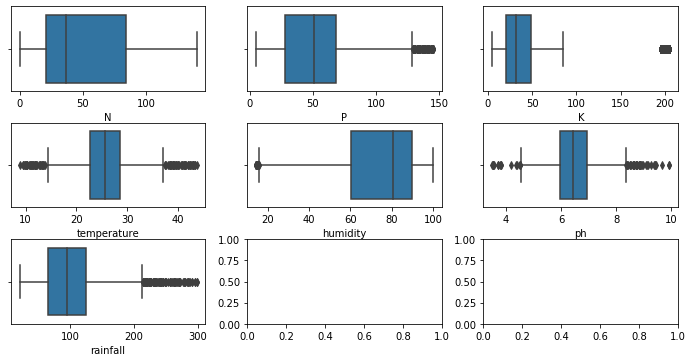

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(10,5))
fig.tight_layout()
k=0
for col in num_cols:
    i, j = divmod(k, 3)
    sns.boxplot(x=col, data=df, ax=ax[i,j])
    k+=1

Since the size of the data set is very less. We are not be removing the outliers here. 

### Visualization

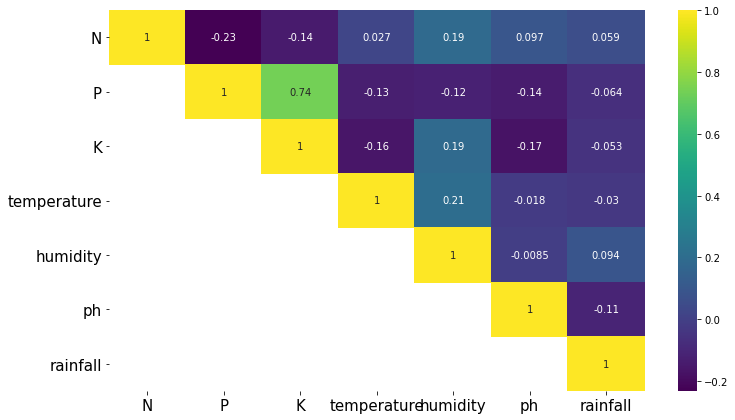

In [8]:
plt.figure(figsize = (12,7))

mask = np.zeros_like(df.corr())
mask[np.tril_indices_from(mask, k = -1)] = True

sns.heatmap(df.corr(), annot = True, annot_kws = {"size": 10},cmap='viridis', mask = mask)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()


**Observation:**

There is a positive correlation between humidity and rtemperature.

P and K are highly correlated. 

N with P and K are negatively correlate.

Humidity influences the Nitrogenous content of soil.

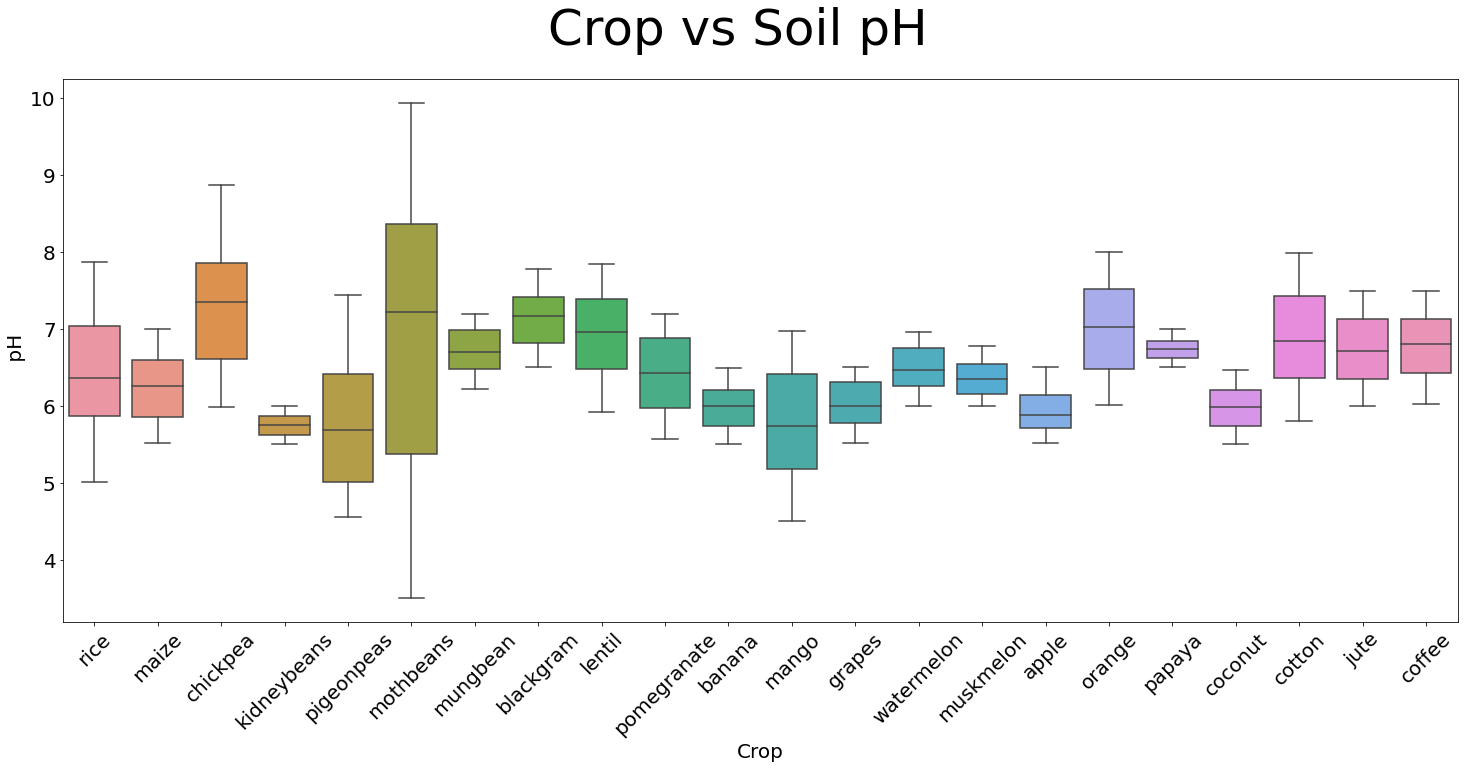

In [55]:
fig, ax = plt.subplots(figsize=(25,10))
fig.suptitle('Crop vs Soil pH', fontsize=50)
sns.boxplot(x='label',y='ph', data=df)
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.ylabel(' pH',fontsize=20)
plt.xlabel('Crop',fontsize=20)
plt.show()

The pH of a soil is a measure of acidity or alkalinity.

**Observation:**

We can observe that most of the crop gow in the range from pH 6.0 to 7.0 is good for vegetables. 

Mothbeans can grow in slightly acidic and alkaline soil.


In [8]:
import plotly.express as px
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
fig = px.bar(crop_summary, x=crop_summary.index, y=["N", "P", "K"])
fig.update_layout(title_text="Comparision between N,P,K",
                  plot_bgcolor='white',height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

nitrogen (N), phosphorus (P), potassium (K) are the essential macronutrients are  of crop.

**Observation:**

Cotton requires high amount of Nitrogen among all.

Grapes and Apple requires very high amount of phosphorus and Potassium.

least amount of NPK in the soil it is the favorable condition of Orange to grow.


In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
crop_scatter = df[(df['label']=='rice') | (df['label']=='jute') | (df['label']=='cotton') |
                     (df['label']=='maize') | (df['label']=='lentil') | (df['label']=='coffee')]

fig = px.scatter(crop_scatter, x="temperature", y="rainfall", color="label", symbol="label")
fig.update_layout(title_text="Prime crops as per temperature and rainfall")
fig.show()

**Observation:**

Rice requires very heavy rainfall (more than 200mm) where the lentils requires the least.

Lentils can grow in all temperature.

In [11]:
#Season wise Crops

print('INSIGHTS:')
print('\n')
print('Summer Crops:', df[(df.temperature > 30) & (df.humidity > 50)]['label'].unique())
print('Winter Crops:', df[(df.temperature < 20) & (df.humidity > 30)]['label'].unique())
print('Rainy Crops:', df[(df.rainfall > 200) & (df.humidity > 30)]['label'].unique())

INSIGHTS:


Summer Crops: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops: ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops: ['rice' 'papaya' 'coconut']


##### Splitting the dependent and independent variables.

In [12]:
df_target = df['label']

df_feature = df.drop('label', axis = 1)

##### Treating the missing values

In [13]:
Total = df.isnull().sum().sort_values(ascending=False) 

Percent = (df_feature.isnull().sum()*100/df_feature.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
K                0                           0.0
N                0                           0.0
P                0                           0.0
humidity         0                           0.0
label            0                           NaN
ph               0                           0.0
rainfall         0                           0.0
temperature      0                           0.0

##### Scaling the numerical variables using the standard scaler

In [16]:
X_scaler = StandardScaler()

num_scaled = X_scaler.fit_transform(df_feature)

X = pd.DataFrame(num_scaled, columns = df_feature.columns)

X.head()

N         P         K  temperature  humidity        ph  rainfall
0  1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361
1  0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058
2  0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066
3  0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048
4  0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1760, 7)
y_train (1760,)
X_test (440, 7)
y_test (440,)


In [18]:
# Initializing empty lists to append all model's name and corresponding accuracy
acc = []
model = []

# LogisticRegression

In [19]:
lg = LogisticRegression()

lg.fit(X_train,y_train)

predicted_values = lg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

acc.append(x)

model.append('LogisticRegression')

print("LogisticRegression Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

LogisticRegression Accuracy is:  0.9704545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      0.96      0.96        23
    chickpea       1.00      1.00      1.00        15
     coconut       0.96      1.00      0.98        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        15
        jute       0.94      0.84      0.89        19
 kidneybeans       0.96      1.00      0.98        22
      lentil       0.97      0.97      0.97        30
       maize       1.00      1.00      1.00        22
       mango       0.95      1.00      0.98        21
   mothbeans       0.94      0.83      0.88        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      

In [20]:
#Print Train Accuracy
lg_train_accuracy = lg.score(X_train,y_train)
print("lg_train_accuracy = ",lg.score(X_train,y_train))

#Print Test Accuracy
lg_test_accuracy = lg.score(X_test,y_test)
print("lg_test_accuracy = ",lg.score(X_test,y_test))

lg_train_accuracy =  0.9755681818181818
lg_test_accuracy =  0.9704545454545455


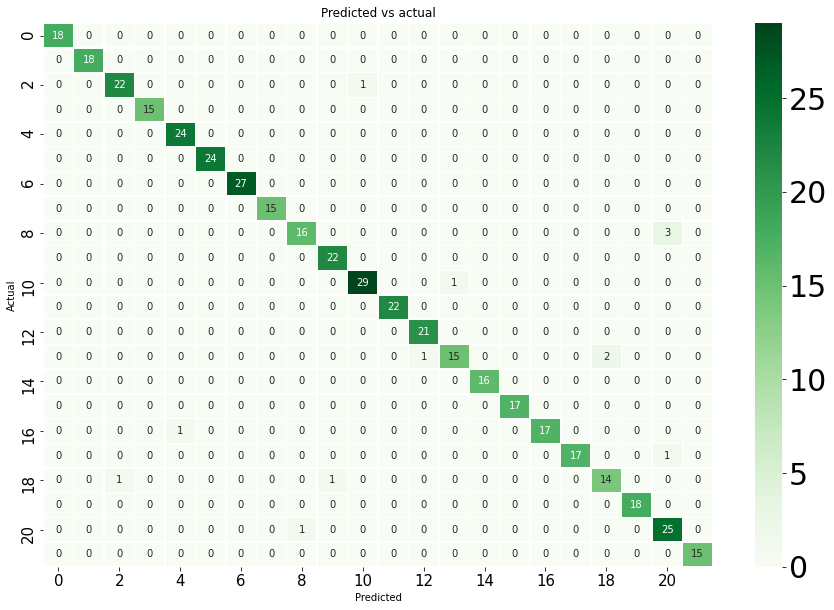

In [21]:
cm_knn = confusion_matrix(y_test,predicted_values)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='Greens', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Decision Tree

In [22]:
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(X_train,y_train)

predicted_values = DT.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

acc.append(x)

model.append('Decision Tree')

print("Decision Tree Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree Accuracy is:  92.27272727272727
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.73      0.83      0.78        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       1.00      0.92      0.96        24
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        15
        jute       1.00      0.21      0.35        19
 kidneybeans       1.00      0.82      0.90        22
      lentil       0.97      1.00      0.98        30
       maize       0.72      0.95      0.82        22
       mango       1.00      0.95      0.98        21
   mothbeans       1.00      0.61      0.76        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00  

In [23]:
score = cross_val_score(DT, df_feature, df_target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


In [24]:
#Print Train Accuracy
dt_train_accuracy = DT.score(X_train,y_train)
print("dt_train_accuracy = ",DT.score(X_train,y_train))

#Print Test Accuracy
dt_test_accuracy = DT.score(X_test,y_test)
print("dt_test_accuracy = ",DT.score(X_test,y_test))

dt_train_accuracy =  0.9318181818181818
dt_test_accuracy =  0.9227272727272727


In [25]:
os.environ['PATH']=os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\\Library\\bin\\graphviz"

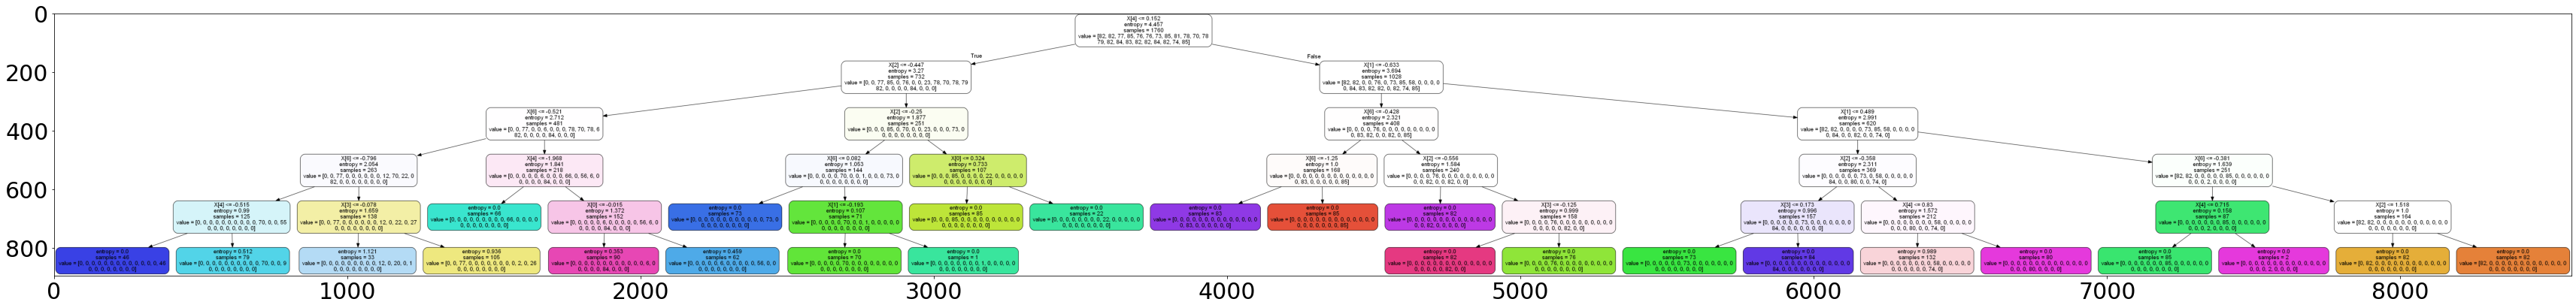

In [26]:
plt.figure(figsize=(60,40)) 
dot_data=tree.export_graphviz(DT,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
plt.imshow(plt.imread('tree.png'))
plt.show()

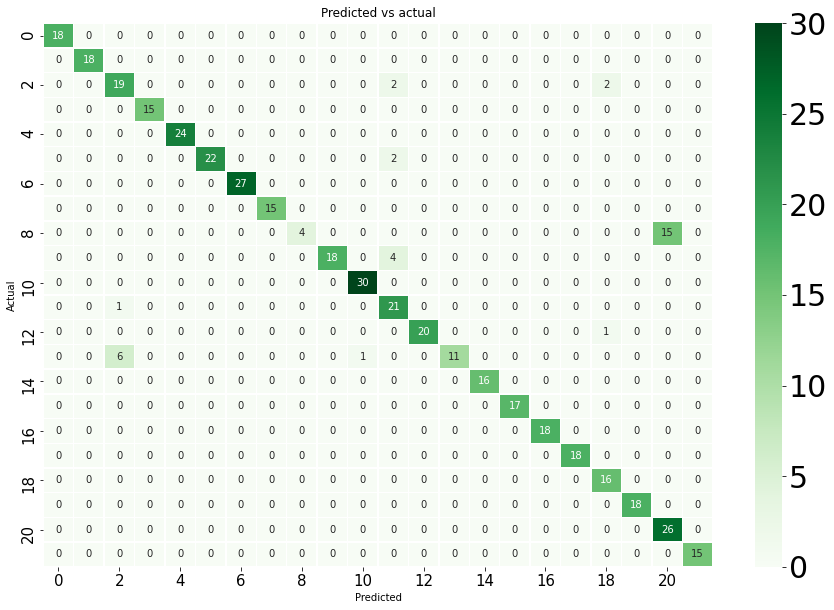

In [27]:
cm_knn = confusion_matrix(y_test,predicted_values)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='Greens', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# KNN

In [28]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

predicted_values = knn.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

acc.append(x)

model.append('KNN')

print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.92      1.00      0.96        23
    chickpea       1.00      1.00      1.00        15
     coconut       0.96      1.00      0.98        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      0.96      0.98        27
      grapes       1.00      1.00      1.00        15
        jute       0.95      1.00      0.97        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        30
       maize       0.96      1.00      0.98        22
       mango       0.95      1.00      0.98        21
   mothbeans       1.00      0.89      0.94        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      0.94      0.97 

In [29]:
score = cross_val_score(knn,df_feature,df_target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


In [30]:
#Print Train Accuracy
knn_train_accuracy = knn.score(X_train,y_train)
print("knn_train_accuracy = ",knn.score(X_train,y_train))

#Print Test Accuracy
knn_test_accuracy = knn.score(X_test,y_test)
print("knn_test_accuracy = ",knn.score(X_test,y_test))

knn_train_accuracy =  0.9801136363636364
knn_test_accuracy =  0.9863636363636363


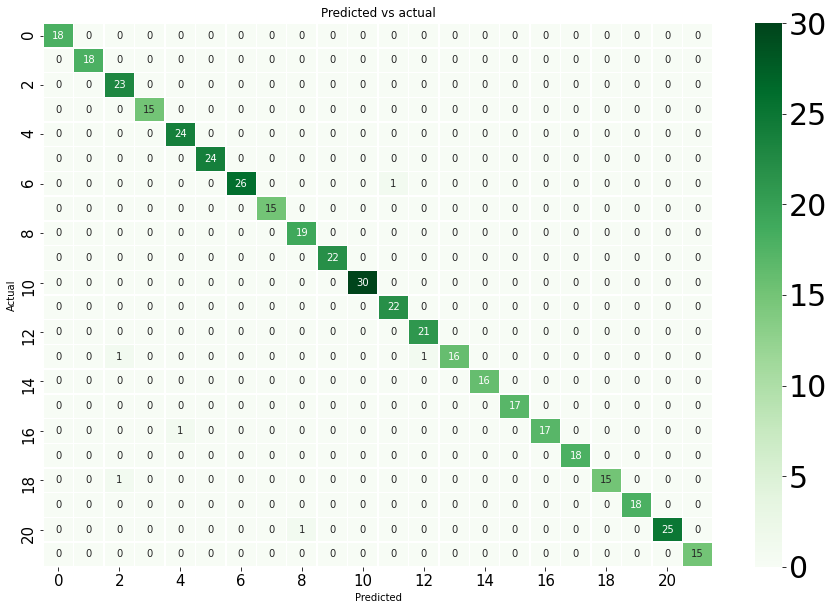

In [31]:
cm_knn = confusion_matrix(y_test,predicted_values)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='Greens', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Random Forest

In [32]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)

RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

print("Random Forest Accuracy is: ", x)

acc.append(x)

model.append('Random Forest')

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.9977272727272727
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        15
        jute       1.00      0.95      0.97        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        30
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [33]:
#Print Train Accuracy
rf_train_accuracy = RF.score(X_train,y_train)
print("rf_train_accuracy = ",RF.score(X_train,y_train))

#Print Test Accuracy
rf_test_accuracy = RF.score(X_test,y_test)
print("rf_test_accuracy = ",RF.score(X_test,y_test))

rf_train_accuracy =  1.0
rf_test_accuracy =  0.9977272727272727


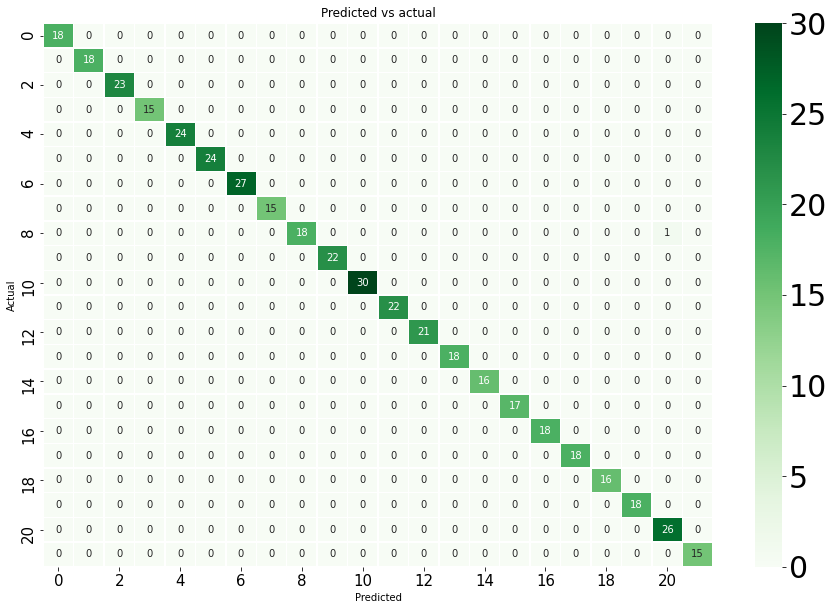

In [34]:
cm_knn = confusion_matrix(y_test,predicted_values)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='Greens', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Naive Bayes Classifier

In [35]:
NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

acc.append(x)

model.append('Naive Bayes')

print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        15
        jute       1.00      0.89      0.94        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        30
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00   

In [36]:
#Print Train Accuracy
gnb_train_accuracy = NaiveBayes.score(X_train,y_train)
print("gnb_train_accuracy = ",NaiveBayes.score(X_train,y_train))

#Print Test Accuracy
gnb_test_accuracy = NaiveBayes.score(X_test,y_test)
print("gnb_test_accuracy = ",NaiveBayes.score(X_test,y_test))

gnb_train_accuracy =  0.9948863636363636
gnb_test_accuracy =  0.9954545454545455


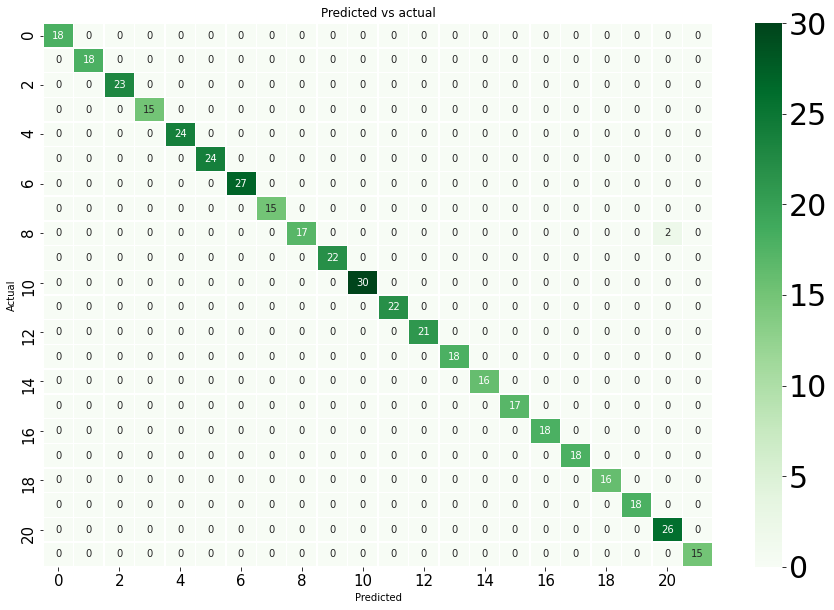

In [37]:
cm_knn = confusion_matrix(y_test,predicted_values)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='Greens', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# XGBoost

In [38]:
import xgboost as xgb

XB = xgb.XGBClassifier()

XB.fit(X_train,y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values);

print("XGBoost Accuracy is: ", x)

acc.append(x)

model.append('XGBoost')

print(classification_report(y_test,predicted_values))

[09:21:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       0.96      1.00      0.98        24
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        15
        jute       1.00      0.84      0.91        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        30

In [39]:
#Print Train Accuracy
xgb_train_accuracy = XB.score(X_train,y_train)
print("xgb_train_accuracy = ",XB.score(X_train,y_train))

#Print Test Accuracy
xgb_test_accuracy = XB.score(X_test,y_test)
print("xgb_test_accuracy = ",XB.score(X_test,y_test))

xgb_train_accuracy =  1.0
xgb_test_accuracy =  0.9931818181818182


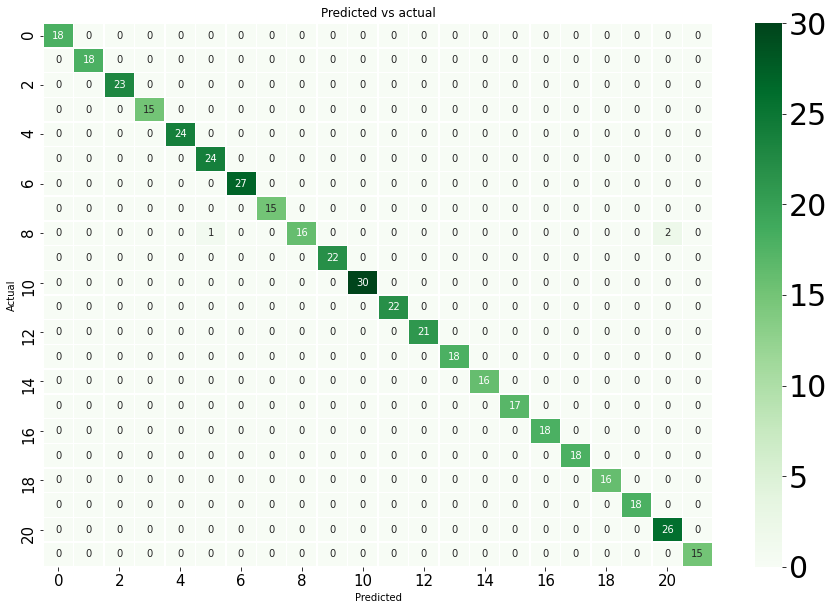

In [40]:
cm_knn = confusion_matrix(y_test,predicted_values)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='Greens', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Accuracy Comparison

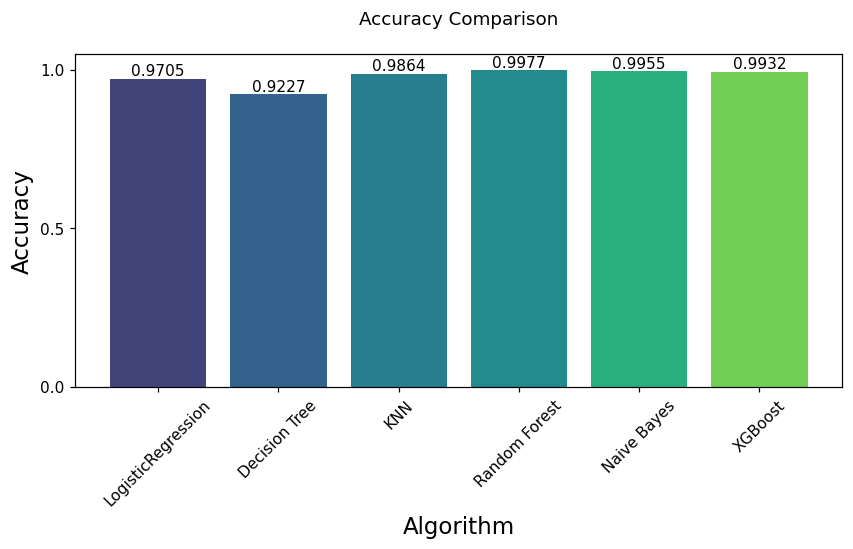

In [53]:
virdis=[ '#404478FF','#33638DFF','#287D8EFF','#238A8DFF','#29AF7FFF','#73D055FF']

plt.figure(figsize=[9,4],dpi = 110)
line = plt.bar(model,acc,color=virdis)
plt.title('Accuracy Comparison\n')
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Algorithm',fontsize=15)
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)

for i in range(len(acc)):
    plt.annotate((str(round(acc[i],4))), xy=(model[i],acc[i]), ha='center', va='bottom')

plt.show()

In [42]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '=>', v)

LogisticRegression => 0.9704545454545455
Decision Tree => 0.9227272727272727
KNN => 0.9863636363636363
Random Forest => 0.9977272727272727
Naive Bayes => 0.9954545454545455
XGBoost => 0.9931818181818182


#### Random Forest seems to perform the best among all the other models.

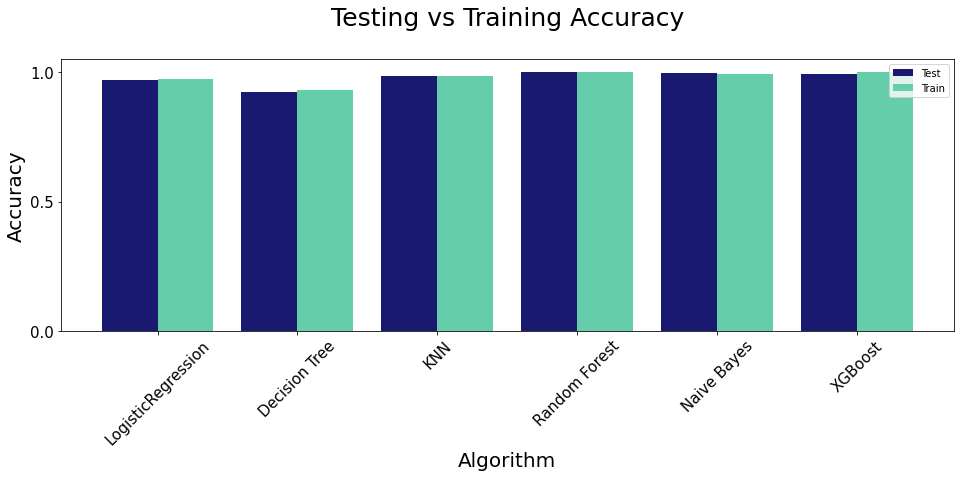

In [44]:
label = model
Test = [lg_test_accuracy, dt_test_accuracy,knn_test_accuracy,rf_train_accuracy,
        gnb_test_accuracy, xgb_test_accuracy]
Train = [lg_train_accuracy,  dt_train_accuracy, knn_test_accuracy, rf_train_accuracy,
         gnb_train_accuracy, xgb_train_accuracy]

f, ax = plt.subplots(figsize=(16,5))
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Algorithm',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.title("Testing vs Training Accuracy\n", fontsize=25)
plt.legend()
plt.show()

### Hyper-parameter tuning for Random Forest using GridSearchCV

In [45]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [ 70, 90],
                     'max_depth': [10, 15],
                     'min_samples_split': [2, 5]}]
                      
random_forest_classification = RandomForestClassifier(random_state = 0)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 70} 



In [46]:
RF = RandomForestClassifier(n_estimators = 70, criterion='entropy', max_depth=15, min_samples_split= 2, random_state=0)

RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        15
        jute       1.00      0.89      0.94        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        30
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [47]:
#Print Train Accuracy
rf_train_accuracy = RF.score(X_train,y_train)
print("rf_train_accuracy = ",RF.score(X_train,y_train))

#Print Test Accuracy
rf_test_accuracy = RF.score(X_test,y_test)
print("rf_test_accuracy = ",RF.score(X_test,y_test))

rf_train_accuracy =  1.0
rf_test_accuracy =  0.9954545454545455


#### Identify the Important Features

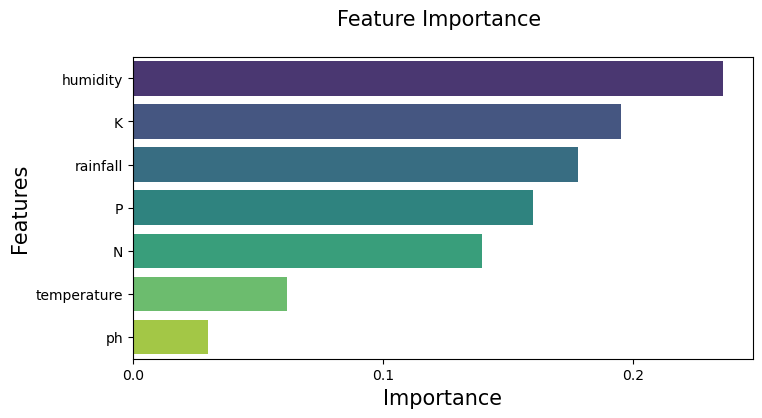

In [48]:
plt.figure(figsize=[8,4],dpi = 100)
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': RF.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features,palette='viridis')

plt.title('Feature Importance \n', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Inference:

* Humidity seems to be the most important feature in predicting the target variable. 

* This is followed by K (Potassium content), rainfall, P (Phosphorus content), N (Nitrogen content), temperature and ph value.

* ph value seems to have the least effect on the target variable.

### Making Prediction

In [49]:
prediction = RF.predict((np.array([[80,42,40,26,80,7,250]])))
print("The suggested Crop for Given Climatic condition is :", prediction)


The suggested Crop for Given Climatic condition is : ['papaya']


#### This Predictive model is usefull for Modern Farming. Based on soil and climatic condition we can suggest the farmers the suitable crop.

### Thank You